In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
import pandas as pd
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'


In [7]:
features

['GrLivArea', 'BedroomAbvGr', 'FullBath']

In [8]:
target

'SalePrice'

In [10]:
data = data.dropna(subset=features + [target])
X = data[features]
y = data[target]


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()       # create the model
model.fit(X_train, y_train)      # train it using training data

LinearRegression()

In [13]:
y_pred = model.predict(X_test)
y_pred[:10]

array([113410.67255298, 305081.87775899, 135904.78562983, 205424.67564124,
       227502.68349004, 121157.48079629, 205577.98056584, 183787.20378269,
       121157.48079629, 147219.22233196])

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred)  # how well the model explains the data
rmse = np.sqrt(mean_squared_error(y_test, y_pred))  # error size

print("R² Score:", round(r2, 3))
print("RMSE:", round(rmse, 0))

R² Score: 0.634
RMSE: 52976.0


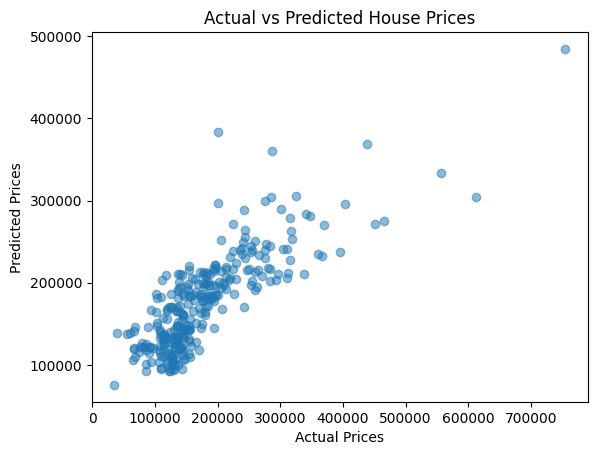

In [15]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [16]:
import joblib


joblib.dump(model, 'house_price_model.pkl')

print("Model saved as house_price_model.pkl")

Model saved as house_price_model.pkl
